In [ ]:
from scipy.io import arff
import pandas as pd # Библиотека Pandas для работы с табличными данными
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего
import matplotlib.pyplot as plt # библиотека Matplotlib для визуализации
import seaborn as sns # библиотека seaborn для визуализации
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего

# предварительная обработка числовых признаков
from sklearn.preprocessing import MinMaxScaler# Импортируем нормализацию от scikit-learn
from sklearn.preprocessing import StandardScaler # Импортируем стандартизацию от scikit-learn
from sklearn.preprocessing import PowerTransformer  # Степенное преобразование от scikit-learn
# предварительная обработка категориальных признаков
from sklearn.preprocessing import OrdinalEncoder# Импортируем Порядковое кодированиеот scikit-learn

from sklearn.pipeline import Pipeline # Pipeline.Не добавить, не убавить

from sklearn.compose import ColumnTransformer # т.н. преобразователь колонок

from sklearn.base import BaseEstimator, TransformerMixin # для создания собственных преобразователей / трансформеров данных

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!gdown --id 1wIY9kG9g2f6gwriz-RACYV7WyVAtgGWy

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1wIY9kG9g2f6gwriz-RACYV7WyVAtgGWy
To: /content/diabetes_prediction_dataset.csv
100% 3.81M/3.81M [00:00<00:00, 140MB/s]


In [ ]:
# Загружаем датасет людей с диабетом
df = pd.read_csv('/content/diabetes_prediction_dataset.csv')

In [ ]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [ ]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
df.info() # смотрим на наши фичи

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


# Визуализация и анализ данных

In [ ]:
df.hypertension = df.hypertension.astype('object')
df.heart_disease = df.heart_disease.astype('object')
df.diabetes = df.diabetes.astype('object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  object 
 3   heart_disease        100000 non-null  object 
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 6.9+ MB


Среди фичей, категориальная одна и единственная - class, обозначающая, есть ли диабет у человека

Разделяем числовые и категориальные фичи

In [ ]:
cat_columns = []
num_columns = []

for column_name in df.columns:
    if (df[column_name].dtypes == object):
        cat_columns +=[column_name]
    else:
        num_columns +=[column_name]

print('categorical columns:\t ',cat_columns, '\n len = ',len(cat_columns))

print('numerical columns:\t ',  num_columns, '\n len = ',len(num_columns))

categorical columns:	  ['gender', 'hypertension', 'heart_disease', 'smoking_history', 'diabetes'] 
 len =  5
numerical columns:	  ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level'] 
 len =  4


Корреляция признаков

In [ ]:
df[num_columns].corr().style.background_gradient(cmap = 'YlOrRd', # наш цветовой стиль
                                    vmin = -1, # указываем нижний диапазон
                                    vmax=1) # указываем верхний  диапазон

,age,bmi,HbA1c_level,blood_glucose_level
age,1.000000,0.337396,0.101354,0.110672
bmi,0.337396,1.000000,0.082997,0.091261
HbA1c_level,0.101354,0.082997,1.000000,0.166733
blood_glucose_level,0.110672,0.091261,0.166733,1.000000


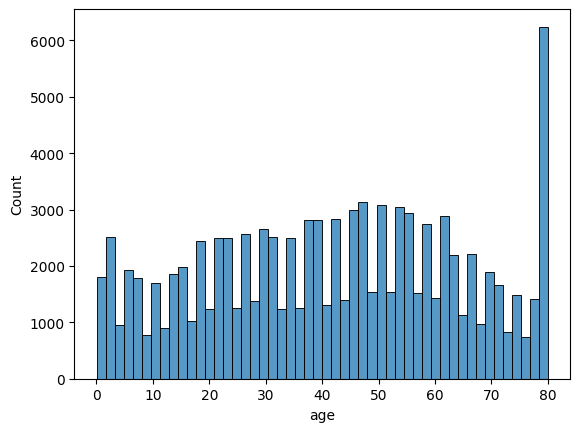

In [ ]:
sns.histplot(data=df, x='age', bins = 50);

<Axes: xlabel='age', ylabel='blood_glucose_level'>

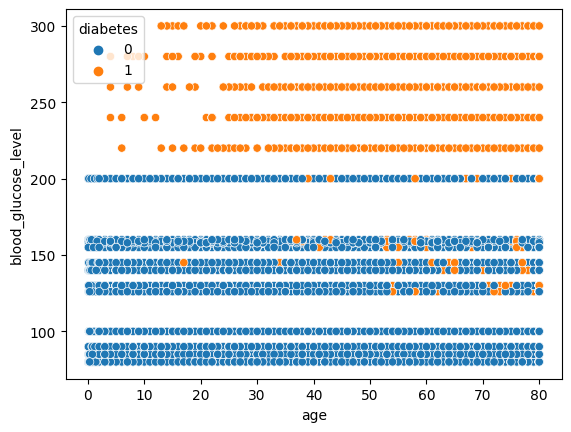

In [ ]:
sns.scatterplot(data=df, x='age', y='blood_glucose_level', hue='diabetes')

С возрастом, наблюдается уровень глюкозы в крови, а также вероятность диагностировать диабет

In [ ]:
df.groupby('diabetes')['age','blood_glucose_level'].mean().reset_index()

,diabetes,age,blood_glucose_level
0,0,40.115187,132.852470
1,1,60.946588,194.094706


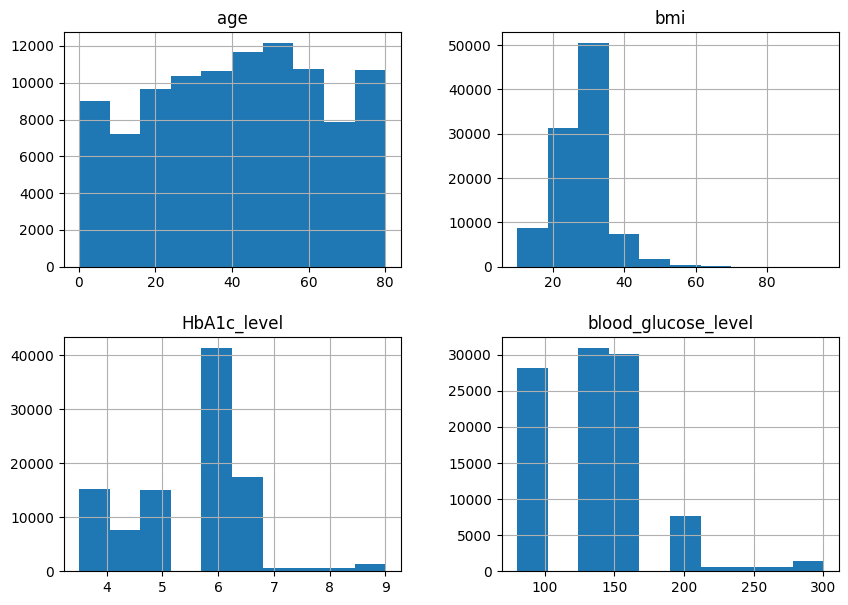

In [ ]:
fig, axs = plt.subplots(2,2,figsize=(10,  7))# создаем "полотно", на котором будем "рисовать" графики

df.hist(column = num_columns, ax = axs );

Графики фичей не выглядят "нормально"

In [ ]:
scale = StandardScaler()

scale.fit(df[num_columns]);

Можно посмотреть на среднее и ско

In [ ]:
scale.mean_, scale.scale_

(array([ 41.885856 ,  27.3207671,   5.527507 , 138.05806  ]),
 array([22.51672729,  6.63675023,  1.07066674, 40.70793251]))

### **Шаг второй**

применяем трансформацию `.transform`

И пакуем результат в Dataframe

In [ ]:
scaled = scale.transform(df[num_columns])
df_standard = pd.DataFrame(scaled, columns= num_columns)
df_standard

,age,bmi,HbA1c_level,blood_glucose_level
0,1.692704,-0.321056,1.001706,0.047704
1,0.538006,-0.000116,1.001706,-1.426210
2,-0.616691,-0.000116,0.161108,0.489878
3,-0.261399,-0.583232,-0.492690,0.416183
4,1.515058,-1.081970,-0.679490,0.416183
...,...,...,...,...
99995,1.692704,-0.000116,0.628107,-1.180558
99996,-1.771388,-1.499343,0.908306,-0.934905
99997,1.070944,0.076729,0.161108,0.416183
99998,-0.794336,1.220361,-1.426688,-0.934905


Визуализируем

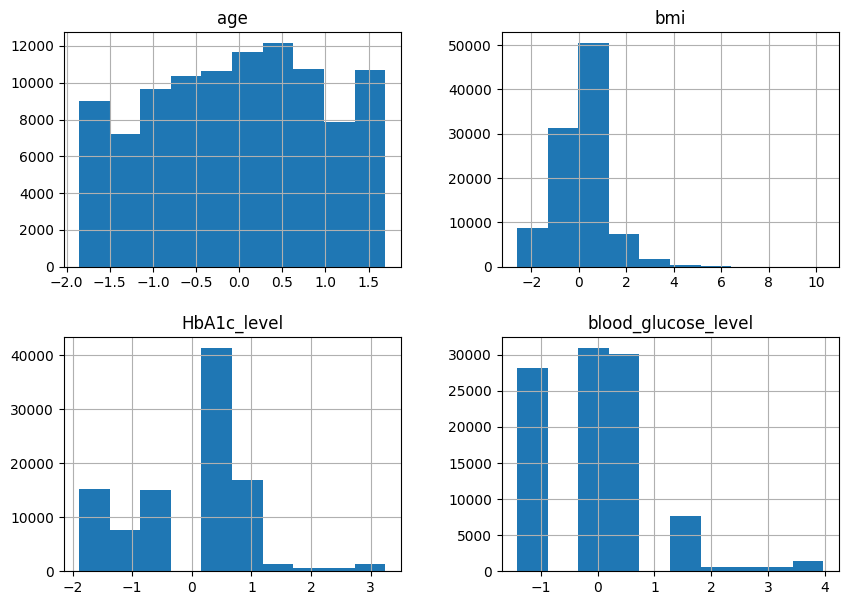

In [ ]:
df_standard.hist(figsize = (10,7), layout= (2,2));

### **Первый шаг**

создаем объект `MinMaxScaler()` и "обучаем" его `.fit`

Где мы сохраняем максимальное (`data_max_`) и минимальное (`data_min_`) исходного набора данных

Это полезно, так как вы можете использовать те же значения для других данных в будущем

In [ ]:
norm = MinMaxScaler()

norm.fit(df[num_columns]);

Можно посмотреть на максимальное и минимальное значения для каждого из принаков

In [ ]:
norm.data_max_, norm.data_min_

(array([ 80.  ,  95.69,   9.  , 300.  ]), array([ 0.08, 10.01,  3.5 , 80.  ]))

### **Шаг второй**

применяем трансформацию `.transform`

И пакуем результат в Dataframe

In [ ]:
normalized = norm.transform(df[num_columns])
df_norm = pd.DataFrame(normalized, columns= num_columns)
df_norm

,age,bmi,HbA1c_level,blood_glucose_level
0,1.000000,0.177171,0.563636,0.272727
1,0.674675,0.202031,0.563636,0.000000
2,0.349349,0.202031,0.400000,0.354545
3,0.449449,0.156863,0.272727,0.340909
4,0.949950,0.118231,0.236364,0.340909
...,...,...,...,...
99995,1.000000,0.202031,0.490909,0.045455
99996,0.024024,0.085901,0.545455,0.090909
99997,0.824825,0.207983,0.400000,0.340909
99998,0.299299,0.296569,0.090909,0.090909


Визуализируем

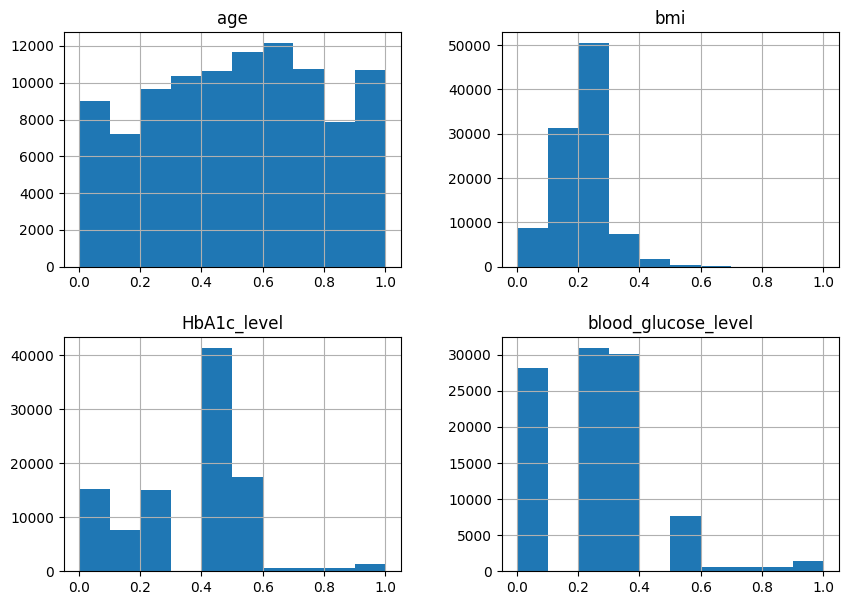

In [ ]:
df_norm.hist(figsize = (10,7), layout= (2,2));

## Степенное преобразование

### **Первый шаг**

Создание Объекта `PowerTransformer()` и его "обучение" `.fit`


In [ ]:
pt = PowerTransformer()

pt.fit(df[num_columns]);

Коэффициенты степени преобразования

In [ ]:
pt.lambdas_

array([0.8079854 , 0.10520842, 1.12953179, 0.12804291])

### **Шаг второй**

применяем трансформацию `.transform`

И пакуем результат в Dataframe

In [ ]:
power = pt.transform(df[num_columns])
df_power = pd.DataFrame(power, columns= num_columns)
df_power

,age,bmi,HbA1c_level,blood_glucose_level
0,1.586282,-0.236987,1.003298,0.173961
1,0.565330,0.102666,1.003298,-1.674968
2,-0.557239,0.102666,0.150932,0.592308
3,-0.196623,-0.533321,-0.501919,0.525551
4,1.433882,-1.153314,-0.686690,0.525551
...,...,...,...,...
99995,1.586282,0.102666,0.622756,-1.297486
99996,-1.949753,-1.742996,0.907914,-0.954591
99997,1.045971,0.180590,0.150932,0.525551
99998,-0.744564,1.214526,-1.417274,-0.954591


Визуализируем

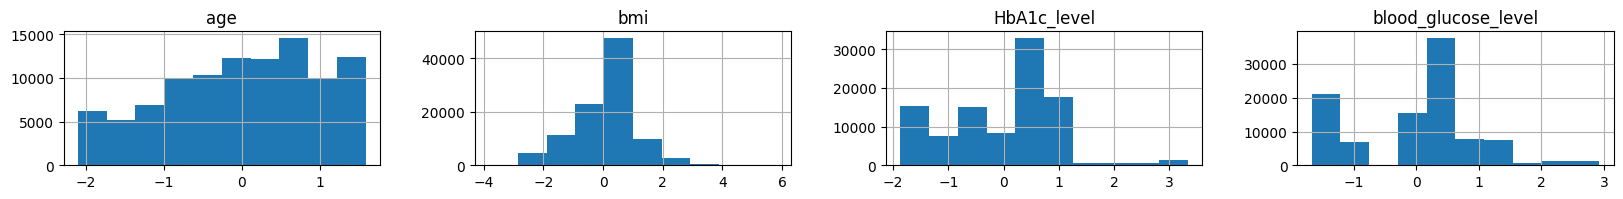

In [ ]:
df_power.hist(figsize = (20,4), layout= (2,4));

## Давайте создадим заменятель редких значений

Посмотрим на статистику числовых признаков

In [ ]:
df.describe()

,age,bmi,HbA1c_level,blood_glucose_level
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,27.320767,5.527507,138.058060
std,22.516840,6.636783,1.070672,40.708136
min,0.080000,10.010000,3.500000,80.000000
25%,24.000000,23.630000,4.800000,100.000000
50%,43.000000,27.320000,5.800000,140.000000
75%,60.000000,29.580000,6.200000,159.000000
max,80.000000,95.690000,9.000000,300.000000


Эта реализация определяет класс `QuantileReplacer`, который наследуется от классов `BaseEstimator` и `TransformerMixin` из scikit-learn. Класс принимает параметр `threshold`, который определяет относительное пороговое значение для идентификации редких числовых значений.

Метод `fit` вычисляет нижний и верхний квантили для каждого числового признака во входном фрейме данных pandas и сохраняет их в словаре.

Метод `transform` заменяет редкие числовые значения значениями, основанными на квантилях, хранящихся в словаре.

Если редкое значение выше, чем среднее значение нижнего и верхнего квантилей, оно заменяется значением высокого квантиля. В противном случае оно заменяется значением нижнего квантиля.

In [ ]:
class QuantileReplacer(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.05):
        self.threshold = threshold
        self.quantiles = {}

    def fit(self, X, y=None):
        for col in X.select_dtypes(include='number'):
            low_quantile = X[col].quantile(self.threshold)
            high_quantile = X[col].quantile(1 - self.threshold)
            self.quantiles[col] = (low_quantile, high_quantile)
        return self

    def transform(self, X):
        X_copy = X.copy()
        for col in X.select_dtypes(include='number'):
            low_quantile, high_quantile = self.quantiles[col]
            rare_mask = ((X[col] < low_quantile) | (X[col] > high_quantile))
            if rare_mask.any():
                rare_values = X_copy.loc[rare_mask, col]
                replace_value = np.mean([low_quantile, high_quantile])
                if rare_values.mean() > replace_value:
                    X_copy.loc[rare_mask, col] = high_quantile
                else:
                    X_copy.loc[rare_mask, col] = low_quantile
        return X_copy

Применение - стандартная рутина

* Создаем объект класса
* "Обучаем" через `.fit`
* Применяем через `.transform`

In [ ]:
qr = QuantileReplacer(threshold=0.01, )

qr.fit(df[num_columns])

DF_num_rare = qr.transform(df[num_columns])

Посмотрим на новую статистику числовых признаков

In [ ]:
DF_num_rare.describe()

,age,bmi,HbA1c_level,blood_glucose_level
count,100000.000000,100000.000000,100000.000000,100000.00000
mean,41.890954,27.617808,5.526199,137.92326
std,22.507525,6.611516,1.066543,40.20162
min,1.080000,14.600000,3.500000,80.00000
25%,24.000000,23.870000,4.800000,100.00000
50%,43.000000,27.320000,5.800000,140.00000
75%,60.000000,29.870000,6.200000,159.00000
max,80.000000,48.790100,8.800000,280.00000


# Предварительная обработка категориальных признаков

## Порядковое кодирование

### **Первый шаг**

Создание Объекта `OrdinalEncoder()` и его "обучение" `.fit`

In [ ]:
ordinal = OrdinalEncoder()
ordinal.fit(df[cat_columns]);

Можно посмотреть на какие категории что значат

In [ ]:
ordinal.categories_

[array(['Female', 'Male', 'Other'], dtype=object),
 array([0, 1], dtype=object),
 array([0, 1], dtype=object),
 array(['No Info', 'current', 'ever', 'former', 'never', 'not current'],
       dtype=object),
 array([0, 1], dtype=object)]

### **Шаг второй**

применяем трансформацию `.transform`

И пакуем результат в Dataframe

In [ ]:
Ordinal_encoded = ordinal.transform(df[cat_columns])
df_ordinal = pd.DataFrame(Ordinal_encoded, columns = cat_columns)
df_ordinal

,gender,hypertension,heart_disease,smoking_history,diabetes
0,0.0,0.0,1.0,4.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,4.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,1.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0
99996,0.0,0.0,0.0,0.0,0.0
99997,1.0,0.0,0.0,3.0,0.0
99998,0.0,0.0,0.0,4.0,0.0


## Напишем заменятель редких категориальных данных

посмотрим на число повторений результата в каждом категориальном признаке

In [ ]:
df[cat_columns].nunique()

gender             3
hypertension       2
heart_disease      2
smoking_history    6
diabetes           2
dtype: int64

Класс `RareGrouper` наследуется от классов `BaseEstimator` и `TransformerMixin` из sklearn.

Метод `fit` вычисляет относительную частоту категориальных признаков во входном DataFrame и сохраняет их в словаре.

Метод `transform` заменяет редкие категориальные признаки на строку `other_value`, указанную во время инициализации.

In [ ]:
class RareGrouper(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.05, other_value='Other'):
        self.threshold = threshold
        self.other_value = other_value
        self.freq_dict = {}

    def fit(self, X, y=None):
        for col in X.select_dtypes(include=['object']):
            freq = X[col].value_counts(normalize=True)
            self.freq_dict[col] = freq[freq >= self.threshold].index.tolist()
        return self

    def transform(self, X, y=None):
        X_copy = X.copy()
        for col in X.select_dtypes(include=['object']):
            X_copy[col] = X_copy[col].apply(lambda x: x if x in self.freq_dict[col] else self.other_value)
        return X_copy

Применение - стандартная рутина

* Создаем объект класса
* "Обучаем" через `.fit`
* Применяем через `.transform`

В этой реализации мы объединили обучение и применение через метод `.fit_transform`

In [ ]:
rg = RareGrouper(threshold=0.001, other_value='rare')
DF_cat_rare = rg.fit_transform(df[cat_columns])
DF_cat_rare

,gender,hypertension,heart_disease,smoking_history,diabetes
0,Female,0,1,never,0
1,Female,0,0,No Info,0
2,Male,0,0,never,0
3,Female,0,0,current,0
4,Male,1,1,current,0
...,...,...,...,...,...
99995,Female,0,0,No Info,0
99996,Female,0,0,No Info,0
99997,Male,0,0,former,0
99998,Female,0,0,never,0


посмотрим на число повторений результата в каждом категориальном признаке после замены

In [ ]:
DF_cat_rare.nunique()

gender             3
hypertension       2
heart_disease      2
smoking_history    6
diabetes           2
dtype: int64

# Pipeline

Создаем объект `Pipeline`

На вход ему подаем список из того, что мы хотим объединить в формате
* строка- название (даем имя Объекту)
* и сам объект (с заданными аргументами, если необходимо)

создадим отдельно `Pipeline` для разных признаков

### Для всех числовых фич

Заменяем редкие значения и стандартизируем

In [ ]:
num_all_pipe = Pipeline([
    ('QuantReplace', QuantileReplacer(threshold=0.01, )),
    ('scaler', StandardScaler()),
    ('power', PowerTransformer()),
])

num_all = num_columns

### Для Class


Достаточно порядкового кодирования

In [ ]:
cat_pipe_target = Pipeline([
    ('encoder', OrdinalEncoder()),

])

cat_target = cat_columns

## Объединяем в единый Трансформер Колонок Данных

Класс `ColumnTransformer` имеет в целом схожий синтаксис с `Pipeline`

т.е. на вход ему также подаем список из того, что мы хотим объединить в формате

* строка- название (даем имя Объекту)
* сам объект (в этом случае подаем объекты Pipeline)
* добавляется еще список названий столбцов, к которым мы применяем эти преобразования


In [ ]:
preprocessors = ColumnTransformer(transformers=[
    ('all_num', num_all_pipe, num_all),
    ('cat_target', cat_pipe_target, cat_target),
])

In [ ]:
preprocessors

ColumnTransformer(transformers=[('all_num',
                                 Pipeline(steps=[('QuantReplace',
                                                  QuantileReplacer(threshold=0.01)),
                                                 ('scaler', StandardScaler()),
                                                 ('power',
                                                  PowerTransformer())]),
                                 ['age', 'bmi', 'HbA1c_level',
                                  'blood_glucose_level']),
                                ('cat_target',
                                 Pipeline(steps=[('encoder',
                                                  OrdinalEncoder())]),
                                 ['gender', 'hypertension', 'heart_disease',
                                  'smoking_history', 'diabetes'])])

"Обучаем" стандартно через `.fit()`

Тут важно, что на вход мы подаем датафреймы, т.к. в них есть колонки к которым мы обращаемся "по именам".

Внимательно следите за названиями колонок, он проверяет всё добуквенно

In [ ]:
preprocessors.fit(df);

### Про то, как оттуда извлекать имена признаков из pipeline

это можно делать ПОСЛЕ того как сделан `.fit()`


**Шаг 1**

спускаемся на уровень трансформеров

In [ ]:
preprocessors.transformers_

[('all_num',
  Pipeline(steps=[('QuantReplace', QuantileReplacer(threshold=0.01)),
                  ('scaler', StandardScaler()), ('power', PowerTransformer())]),
  ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']),
 ('cat_target',
  Pipeline(steps=[('encoder', OrdinalEncoder())]),
  ['gender', 'hypertension', 'heart_disease', 'smoking_history', 'diabetes'])]

**Шаг 2**

выбираем нужный трансформер (с индексом 4)

In [ ]:
preprocessors.transformers_[0]

('all_num',
 Pipeline(steps=[('QuantReplace', QuantileReplacer(threshold=0.01)),
                 ('scaler', StandardScaler()), ('power', PowerTransformer())]),
 ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level'])

**Шаг 3**

Берем Pipeline (индекс 1, под индексом 0 - название)

In [ ]:
preprocessors.transformers_[0][0]

'all_num'

In [ ]:
preprocessors.transformers_[0][1]

Pipeline(steps=[('QuantReplace', QuantileReplacer(threshold=0.01)),
                ('scaler', StandardScaler()), ('power', PowerTransformer())])

**Шаг 4**

обращаемся к Pipeline "по имени" (потому что это уже не список, а словарь)

In [ ]:
preprocessors.transformers_[0][1]['scaler']

StandardScaler()

**Шаг 5**  

применяем то же метод `.get_feature_names_out` что и раньше

In [ ]:
preprocessors.transformers_[0][1]['scaler'].get_feature_names_out(num_all)

array(['age', 'bmi', 'HbA1c_level', 'blood_glucose_level'], dtype=object)

Повторим это для всех категориальных признаков с one-hot кодированием

In [ ]:
cat_class_names = preprocessors.transformers_[1][1]['encoder'].get_feature_names_out(cat_target)


# объединяем названия колонок в один список (важен порядок как в ColumnTransformer)
columns = np.hstack([num_all,
                    cat_target,
                    ])

In [ ]:
df_transformed = preprocessors.transform(df)
pd.DataFrame(df_transformed, columns=columns)

,age,bmi,HbA1c_level,blood_glucose_level,gender,hypertension,heart_disease,smoking_history,diabetes
0,1.723352,-0.274641,1.015652,0.151168,0.0,0.0,1.0,4.0,0.0
1,0.526923,0.087186,1.015652,-1.612137,0.0,0.0,0.0,0.0,0.0
2,-0.626987,0.087186,0.117928,0.579825,1.0,0.0,0.0,4.0,0.0
3,-0.277461,-0.597019,-0.527485,0.511229,0.0,0.0,0.0,1.0,0.0
4,1.537367,-1.267937,-0.704151,0.511229,1.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
99995,1.723352,0.087186,0.608774,-1.288743,0.0,0.0,0.0,0.0,0.0
99996,-1.741062,-1.880658,0.912897,-0.975634,0.0,0.0,0.0,0.0,0.0
99997,1.075215,0.167863,0.117928,0.511229,1.0,0.0,0.0,3.0,0.0
99998,-0.800336,1.172192,-1.387364,-0.975634,0.0,0.0,0.0,4.0,0.0
